<a href="https://colab.research.google.com/github/akshit-jain/Bitcoin-Price_prediction/blob/main/Artificial_Intelligence_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests, pandas as pd, numpy as np, matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential


In [ ]:
api_key = '8457650d37bd4476892bd021c85b79d5'
symbol = 'BTC/INR'
interval = '45min'
order = 'asc'
start_date = '2021-03-31 00:00:00'
end_date = '2021-04-20 00:00:00'

api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&start_date={start_date}&end_date{end_date}&interval={interval}&order={order}&apikey={api_key}'


In [ ]:
data = requests.get(api_url).json()
data_final = pd.DataFrame(data['values'])
data_final

,datetime,open,high,low,close
0,2021-11-17 00:00:00,4471729.00000,4496932.00000,4431071.00000,4438058.00000
1,2021-11-17 00:45:00,4449788.50000,4480293.00000,4435338.50000,4480293.00000
2,2021-11-17 01:30:00,4478565.50000,4483787.50000,4406695.50000,4434914.00000
3,2021-11-17 02:15:00,4436313.50000,4441861.50000,4411697.50000,4422909.50000
4,2021-11-17 03:00:00,4419358.50000,4449588.50000,4366418.00000,4431561.50000
...,...,...,...,...,...
4995,2022-04-23 06:00:00,3026550.25000,3033843.25000,3024495.50000,3026759.75000
4996,2022-04-23 06:45:00,3027064.75000,3032109.75000,3026917.00000,3029969.50000
4997,2022-04-23 07:30:00,3030359.50000,3030359.50000,3024390.00000,3024767.75000
4998,2022-04-23 08:15:00,3029760.75000,3033990.00000,3028191.75000,3028950.50000


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data_final['close'].values.reshape(-1,1))

In [ ]:
time_intervals_to_train = 24 # previous 2 hrs data which is used to train
prediction_interval = 12 # next 1 hr data which is to be predicted

x_train = []
y_train = []

In [ ]:
for i in range(time_intervals_to_train, len(scaled_data) - prediction_interval):
  x_train.append(scaled_data[i - time_intervals_to_train: i, 0])
  y_train.append(scaled_data[i + prediction_interval, 0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = Sequential()

model.add(LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1), activation = 'relu'))
model.add(Dropout(0.4))
model.add(LSTM(64, return_sequences = True, activation = 'relu'))
model.add(Dropout(0.3))
model.add(LSTM(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation= 'sigmoid'))

In [ ]:
model.compile(loss = 'mean_squared_error', optimizer= 'adam', metrics= ['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
78/78 [==============================] - 18s 154ms/step - loss: 0.0157 - accuracy: 2.0145e-04
Epoch 2/10
78/78 [==============================] - 12s 160ms/step - loss: 0.0034 - accuracy: 2.0145e-04
Epoch 3/10
78/78 [==============================] - 8s 99ms/step - loss: 0.0031 - accuracy: 2.0145e-04
Epoch 4/10
78/78 [==============================] - 7s 85ms/step - loss: 0.0029 - accuracy: 2.0145e-04
Epoch 5/10
78/78 [==============================] - 7s 84ms/step - loss: 0.0029 - accuracy: 2.0145e-04
Epoch 6/10
78/78 [==============================] - 7s 86ms/step - loss: 0.0027 - accuracy: 2.0145e-04
Epoch 7/10
78/78 [==============================] - 6s 82ms/step - loss: 0.0026 - accuracy: 2.0145e-04
Epoch 8/10
78/78 [==============================] - 7s 85ms/step - loss: 0.0026 - accuracy: 2.0145e-04
Epoch 9/10
78/78 [==============================] - 7s 83ms/step - loss: 0.0025 - accuracy: 2.0145e-04
Epoch 10/10
78/78 [==============================] - 7s 85ms/step - l

In [ ]:
test_start = '2021-03-31 00:00:00'
test_end = '2021-04-20 00:00:00'

test_api_url = f'https://api.twelvedata.com/time_series?symbol={symbol}&start_date={test_start}&end_date{test_end}&interval={interval}&order={order}&apikey={api_key}'
test_data = requests.get(test_api_url).json()
test_data_final = pd.DataFrame(test_data['values'])
test_data_final

,datetime,open,high,low,close
0,2021-11-17 00:00:00,4471729.00000,4496932.00000,4431071.00000,4438058.00000
1,2021-11-17 00:45:00,4449788.50000,4480293.00000,4435338.50000,4480293.00000
2,2021-11-17 01:30:00,4478565.50000,4483787.50000,4406695.50000,4434914.00000
3,2021-11-17 02:15:00,4436313.50000,4441861.50000,4411697.50000,4422909.50000
4,2021-11-17 03:00:00,4419358.50000,4449588.50000,4366418.00000,4431561.50000
...,...,...,...,...,...
4995,2022-04-23 06:00:00,3026550.25000,3033843.25000,3024495.50000,3026759.75000
4996,2022-04-23 06:45:00,3027064.75000,3032109.75000,3026917.00000,3029969.50000
4997,2022-04-23 07:30:00,3030359.50000,3030359.50000,3024390.00000,3024767.75000
4998,2022-04-23 08:15:00,3029760.75000,3033990.00000,3028191.75000,3028950.50000


In [ ]:
bitcoin_prices = pd.to_numeric(test_data_final['close'], errors = 'coerce').values

test_inputs = test_data_final['close'].values
test_inputs = test_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(test_inputs)

In [ ]:
x_test = []

for x in range(time_intervals_to_train, len(model_inputs)):
  x_test.append(model_inputs[x - time_intervals_to_train:x , 0])
  
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

In [ ]:
prediction_prices

array([[4410488.5],
       [4411645.5],
       [4412875.5],
       ...,
       [3071159. ],
       [3070718.8],
       [3070375.5]], dtype=float32)

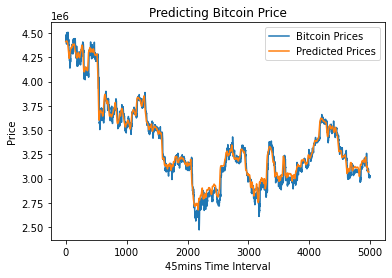

In [ ]:
plt.plot(bitcoin_prices, label = 'Bitcoin Prices')
plt.plot(prediction_prices, label = 'Predicted Prices')
plt.title('Predicting Bitcoin Price')
plt.xlabel('45mins Time Interval')
plt.ylabel('Price')
plt.legend()
plt.show()